# Algorytm realizujący QFT na 3 qbitach

In [63]:
# from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

In [64]:
from qiskit import Aer
from qiskit import assemble

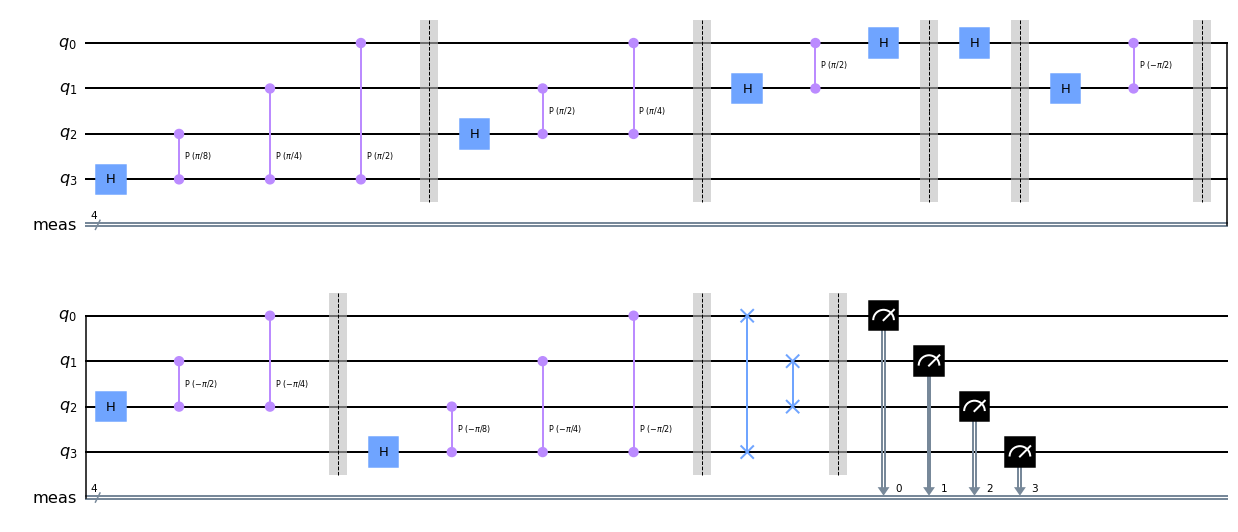

In [65]:
q = QuantumCircuit(4)

# Czwarty qbit
q.h(3)
q.cp(pi/8,2,3)
q.cp(pi/4,1,3)
q.cp(pi/2,0,3)
q.barrier()

# Trzeci qbit
q.h(2)
q.cp(pi/2,1,2)
q.cp(pi/4,0,2)
q.barrier()

# Drugi qbit
q.h(1)
q.cp(pi/2,0,1)

# Pierwszy qbit
q.h(0)
q.barrier()

# IQFT

# Pierwszy qbit
q.h(0)
q.barrier()

# Drugi qbit
q.h(1)
q.cp(-pi/2,0,1)
q.barrier()

# Trzeci qbit
q.h(2)
q.cp(-pi/2,1,2)
q.cp(-pi/4,0,2)
q.barrier()

# Czwarty qbit
q.h(3)
q.cp(-pi/8,2,3)
q.cp(-pi/4,1,3)
q.cp(-pi/2,0,3)
q.barrier()

# Swapy z powodu różnicy notacji
q.swap(0,3)
q.swap(1,2)

q.measure_all()

q.draw(output='mpl')


{'0000': 1000}


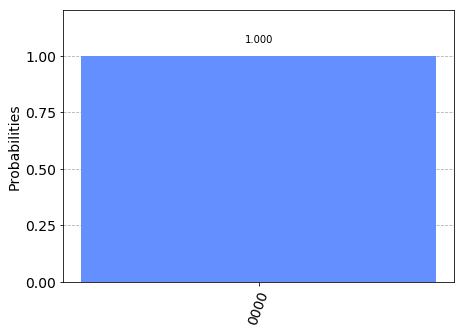

In [66]:
sym = Aer.get_backend('qasm_simulator')
qobj = assemble(q, shots=1000)
wyniki = sym.run(qobj)

hist = wyniki.result().get_counts()
print(hist)

from qiskit.visualization import plot_histogram

plot_histogram(hist)